<a href="https://colab.research.google.com/github/mafaldasalomao/ocr_recognition/blob/main/OCR_Reconhecimento_de_texto_manuscrito_Testando_o_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento de texto manuscrito - testando o modelo

# Importando as bibliotecas

In [1]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import imutils
from google.colab.patches import cv2_imshow

# Carregando a rede neural

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rede_neural = load_model('/content/drive/MyDrive/Pesquisas/OCR_recognition/OCR com Python/Modelos/rede_neural')
rede_neural.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

# Carregando a imagem de teste

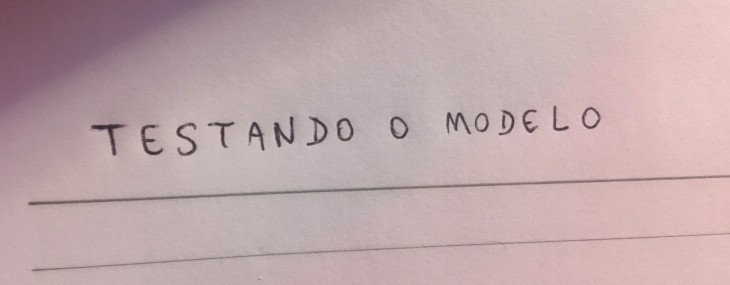

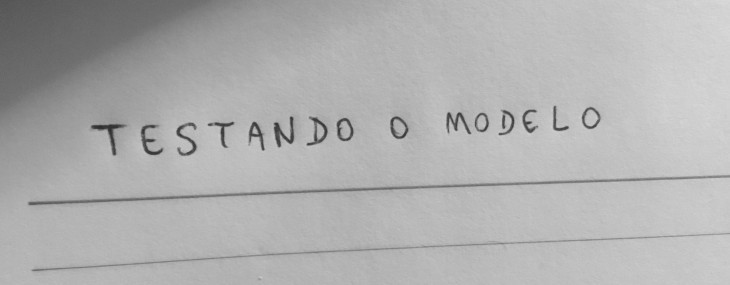

In [4]:
img = cv2.imread('/content/teste-manuscrito01.jpg')
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# Pré-processamento da imagem

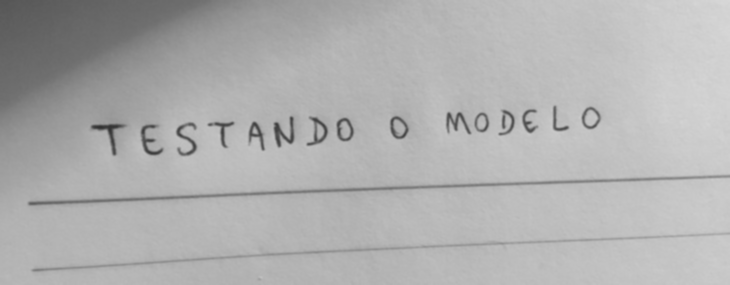

In [5]:
desfoque = cv2.GaussianBlur(gray, (3,3), 0)
cv2_imshow(desfoque)

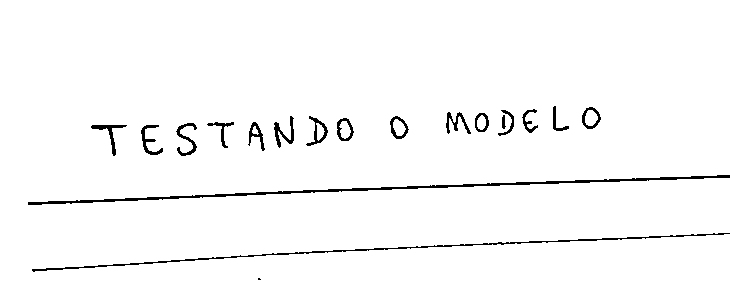

In [6]:
adapt_media = cv2.adaptiveThreshold(desfoque, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adapt_media)

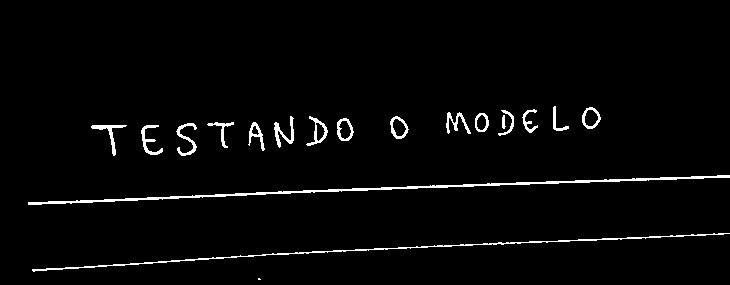

In [7]:
inv = 255 - adapt_media
cv2_imshow(inv)

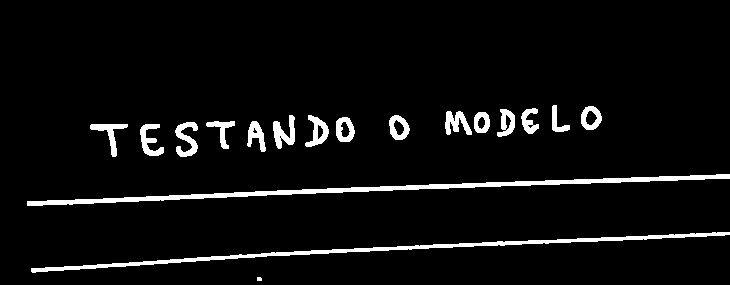

In [8]:
dilatado = cv2.dilate(inv, np.ones((3,3)))
cv2_imshow(dilatado)

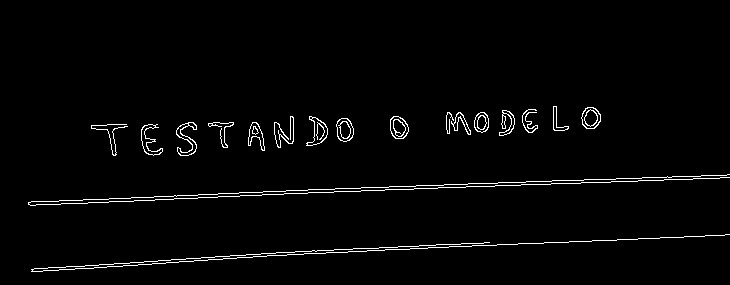

In [9]:
bordas = cv2.Canny(desfoque, 40, 150)
cv2_imshow(bordas)

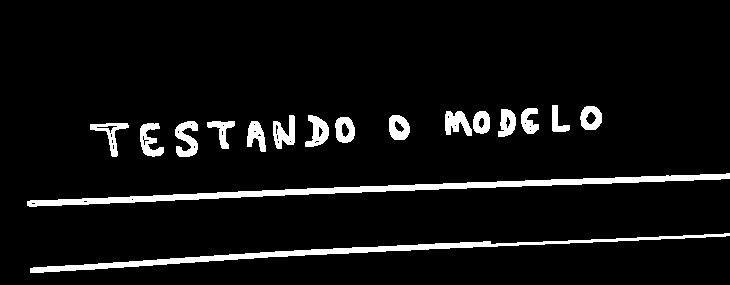

In [10]:
dilatado = cv2.dilate(bordas, np.ones((3,3)))
cv2_imshow(dilatado)

# Detecção de contornos

In [11]:
def encontrar_contornos(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method='left-to-right')[0]
  return conts

In [12]:
conts = encontrar_contornos(dilatado.copy())

In [13]:
conts

(array([[[726, 173]],
 
        [[725, 174]],
 
        [[700, 174]],
 
        [[699, 175]],
 
        [[671, 175]],
 
        [[670, 176]],
 
        [[669, 176]],
 
        [[668, 175]],
 
        [[666, 175]],
 
        [[665, 176]],
 
        [[641, 176]],
 
        [[640, 177]],
 
        [[615, 177]],
 
        [[614, 178]],
 
        [[583, 178]],
 
        [[582, 179]],
 
        [[551, 179]],
 
        [[550, 180]],
 
        [[525, 180]],
 
        [[524, 181]],
 
        [[497, 181]],
 
        [[496, 182]],
 
        [[467, 182]],
 
        [[466, 183]],
 
        [[443, 183]],
 
        [[442, 184]],
 
        [[415, 184]],
 
        [[414, 185]],
 
        [[388, 185]],
 
        [[387, 186]],
 
        [[360, 186]],
 
        [[359, 187]],
 
        [[334, 187]],
 
        [[333, 188]],
 
        [[307, 188]],
 
        [[306, 189]],
 
        [[285, 189]],
 
        [[284, 190]],
 
        [[262, 190]],
 
        [[261, 191]],
 
        [[238, 191]],
 
        [[237, 1

In [14]:
l_min, l_max = 4, 160
a_min, a_max = 14, 140

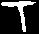

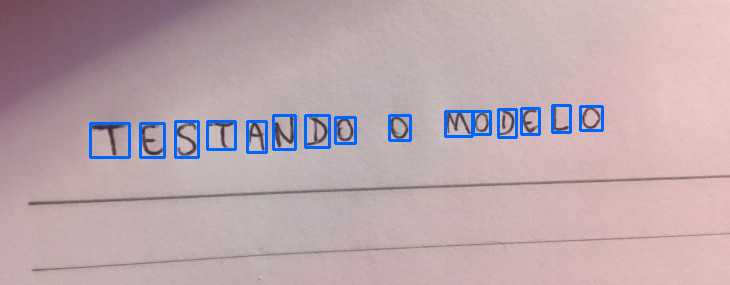

In [15]:
caracteres = []
img_cp = img.copy()
for c in conts:
  #print(c)
  (x, y, w, h) = cv2.boundingRect(c)
  #print(x, y, w, h)
  if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
    roi = gray[y:y+ h, x:x + w]
    #cv2_imshow(roi)
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh)
    cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255, 100, 0), 2)
cv2_imshow(img_cp)

# Processando os caracteres detectados

## Extração ROI


In [16]:
def extra_roi(img):
  roi = img[y:y + h, x:x + w]
  return roi

## Limiarização

In [17]:
def limiarizacao(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  return thresh

## Redimensionamento

In [18]:
def redimensiona_img(img, l, a):
  if l > a:
    redimensionada = imutils.resize(img, width=28)
  else:
    redimensionada = imutils.resize(img, height=28)

  (a, l) = redimensionada.shape
  dX = int(max(0, 28 - l) / 2.0)
  dY = int(max(0, 28 - a) / 2.0)

  preenchida = cv2.copyMakeBorder(redimensionada, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  preenchida = cv2.resize(preenchida, (28, 28))
  return preenchida

In [19]:
(x, y, w, h) = cv2.boundingRect(conts[6])
print(x, y, w, h)
img_teste = limiarizacao(gray[y:y+h, x:x+w])
cv2_imshow(img_teste)
(a, l) = img_teste.shape
print(a, l)
img_teste2 = redimensiona_img(img_teste, l, a)
cv2_imshow(img_teste2)
img_teste2.shape

247 121 19 31


31 19


(28, 28)

In [20]:
cv2_imshow(cv2.resize(img_teste, (28,28)))

## Normalização

In [21]:
def normalizacao(img):
  img = img.astype('float32') / 255.0
  img = np.expand_dims(img, axis=-1)
  return img

In [22]:
img_teste2.shape, normalizacao(img_teste2).shape

((28, 28), (28, 28, 1))

## Processamento das detecções

In [23]:
def processa_caixa(gray, x, y, w, h):
  roi = extra_roi(gray)
  limiar = limiarizacao(roi)
  (a, l) = limiar.shape
  redimensionada = redimensiona_img(limiar, l, a)
  cv2_imshow(redimensionada)
  normalizada = normalizacao(redimensionada)
  caracteres.append((normalizada, (x, y, w, h)))

In [24]:
for c in conts:
  #print(c)
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
    processa_caixa(gray, x, y, w, h)

In [25]:
caracteres[0]

(array([[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],
 
        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
        

In [26]:
caixas = [caixa[1] for caixa in caracteres]
caixas

[(90, 123, 39, 34),
 (140, 123, 24, 34),
 (175, 121, 23, 36),
 (207, 121, 28, 28),
 (247, 121, 19, 31),
 (273, 115, 22, 34),
 (305, 115, 24, 32),
 (335, 117, 20, 26),
 (389, 115, 21, 25),
 (445, 111, 27, 25),
 (473, 111, 17, 23),
 (498, 109, 18, 28),
 (521, 108, 18, 26),
 (552, 105, 18, 27),
 (580, 106, 22, 24)]

In [27]:
caracteres = np.array([c[0] for c in caracteres], dtype='float32')

In [28]:
caracteres

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

# Reconhecimento dos caracteres

In [29]:
numeros = "0123456789"
letras = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
lista_caracteres = numeros + letras
lista_caracteres = [l for l in lista_caracteres]

In [30]:
print(lista_caracteres)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [31]:
caracteres[0].shape

(28, 28, 1)

In [32]:
caracteres.shape

(15, 28, 28, 1)

In [33]:
previsoes = rede_neural.predict(caracteres)

1/1 [==============================] - 8s 8s/step


In [34]:
previsoes

array([[6.10222390e-14, 1.75958601e-15, 3.37840892e-27, 5.81621046e-18,
        7.11929769e-14, 8.91851926e-10, 9.53979439e-19, 6.79566936e-09,
        2.10921874e-17, 1.75357721e-13, 1.40588517e-16, 6.68389097e-22,
        2.90404983e-12, 2.52003906e-15, 1.34289050e-19, 1.85689706e-17,
        2.11306792e-10, 1.96981509e-16, 1.83612811e-21, 1.15765097e-07,
        6.09766126e-11, 7.35139206e-12, 4.00375872e-15, 7.20368352e-18,
        2.66050931e-11, 8.46178769e-12, 1.31129353e-17, 5.88542447e-17,
        2.34906920e-11, 9.99999881e-01, 3.94276209e-11, 3.36897717e-26,
        2.09094007e-22, 4.55960250e-21, 3.54741167e-11, 8.61462492e-15],
       [7.44460047e-21, 2.09508037e-18, 5.87276122e-22, 0.00000000e+00,
        1.68066782e-16, 7.05399552e-15, 1.41000905e-10, 3.04076573e-24,
        3.71919419e-15, 5.13701423e-20, 1.86477465e-19, 6.33237861e-16,
        4.30749013e-12, 8.51628323e-21, 1.00000000e+00, 3.23367750e-08,
        4.77389239e-11, 1.98435217e-20, 5.77024786e-32, 1.92907

In [35]:
previsoes.shape

(15, 36)

In [36]:
caixas

[(90, 123, 39, 34),
 (140, 123, 24, 34),
 (175, 121, 23, 36),
 (207, 121, 28, 28),
 (247, 121, 19, 31),
 (273, 115, 22, 34),
 (305, 115, 24, 32),
 (335, 117, 20, 26),
 (389, 115, 21, 25),
 (445, 111, 27, 25),
 (473, 111, 17, 23),
 (498, 109, 18, 28),
 (521, 108, 18, 26),
 (552, 105, 18, 27),
 (580, 106, 22, 24)]

T  ->  99.99998807907104


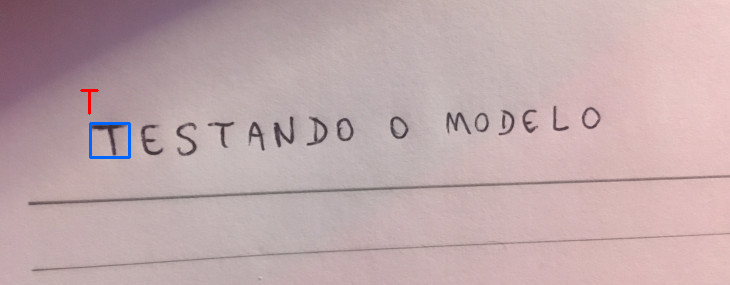

E  ->  100.0


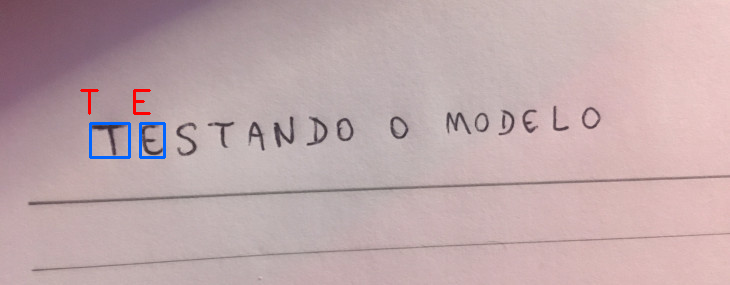

S  ->  94.17409300804138


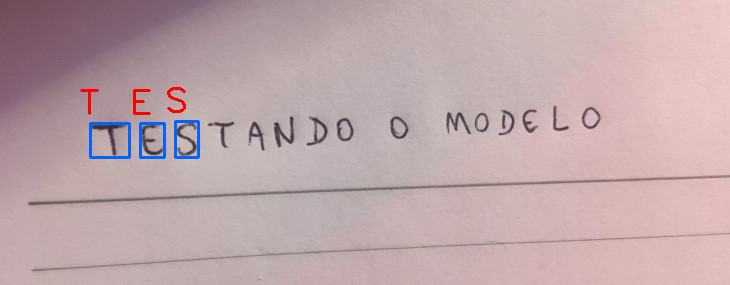

T  ->  99.92138147354126


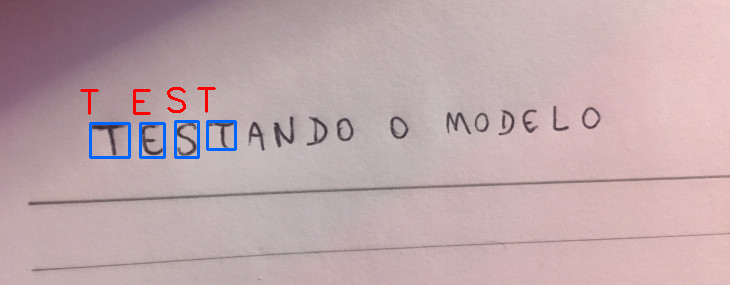

A  ->  99.99927282333374


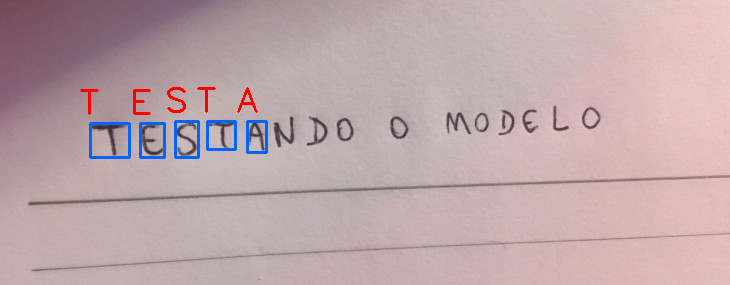

N  ->  99.99818801879883


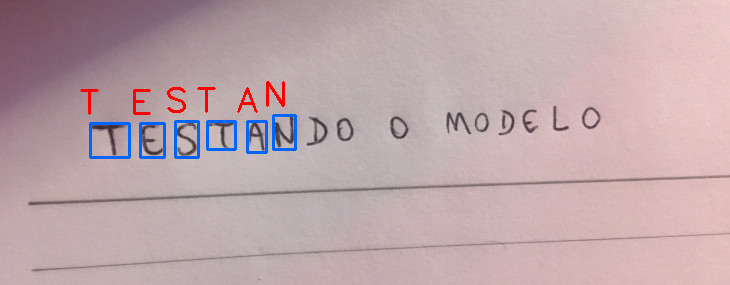

D  ->  99.998939037323


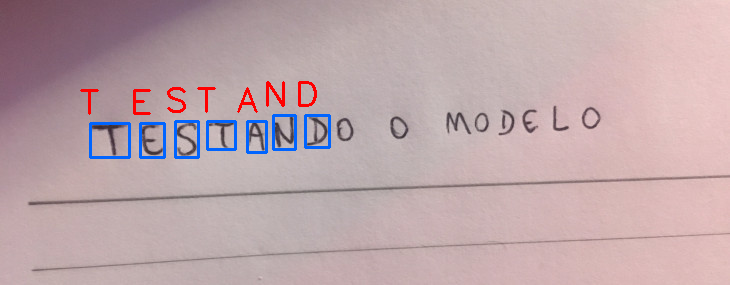

O  ->  96.5272307395935


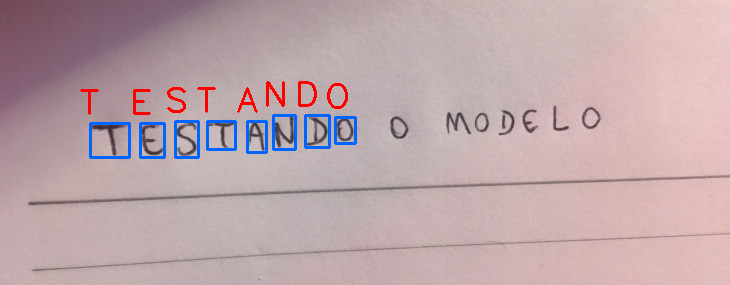

O  ->  75.24757981300354


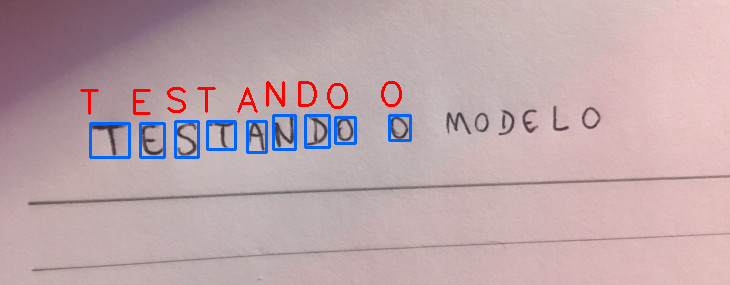

M  ->  99.72489476203918


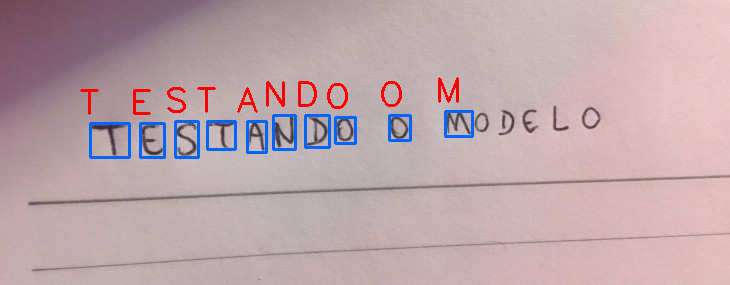

0  ->  85.25797724723816


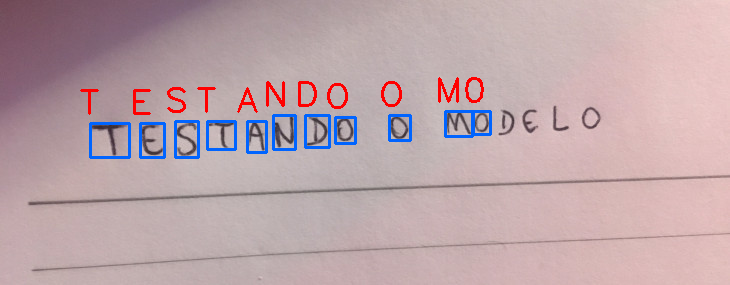

D  ->  63.49874138832092


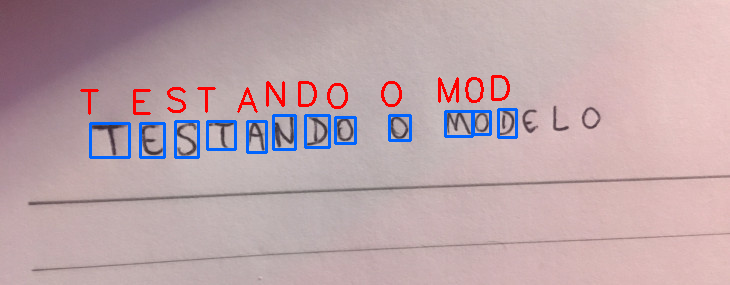

E  ->  100.0


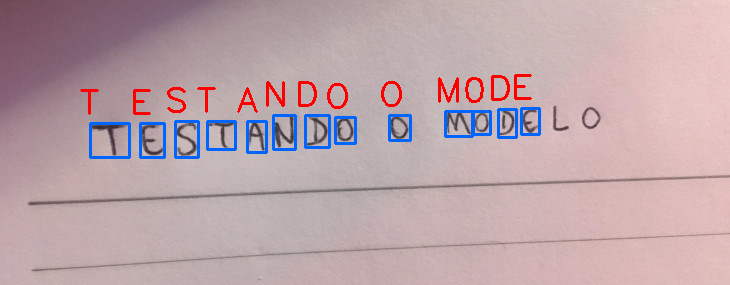

L  ->  99.99963045120239


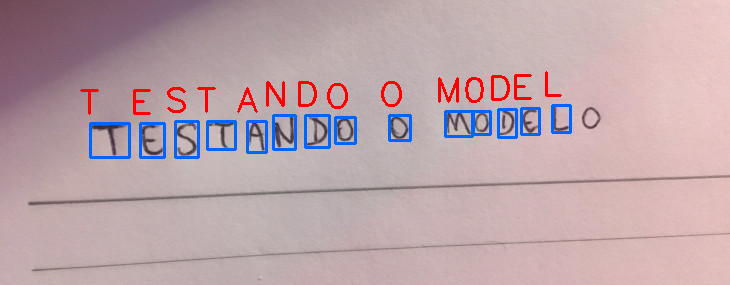

0  ->  67.17216968536377


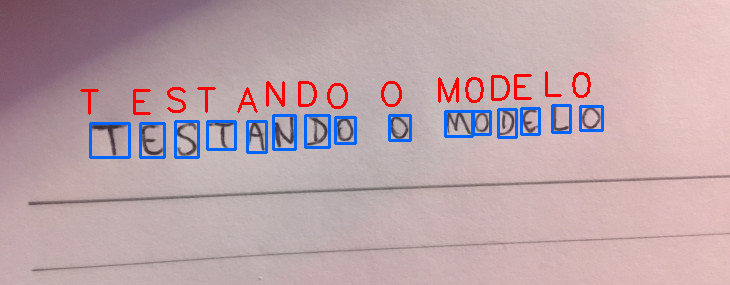

In [37]:
img_cp = img.copy()
for (previsoes, (x, y, w, h)) in zip(previsoes, caixas):
  i = np.argmax(previsoes)
  #print(i)
  probabilidade = previsoes[i]
  #print(probabilidade)
  caractere = lista_caracteres[i]
  #print(caractere)

  cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255,100,0), 2)
  cv2.putText(img_cp, caractere, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255), 2)
  print(caractere, ' -> ', probabilidade * 100)

  cv2_imshow(img_cp)

In [38]:
def extrai_roi(img, margem=2):
  roi = img[y - margem:y + h + margem, x - margem:x + w + margem]
  return roi

In [39]:
conts = encontrar_contornos(dilatado.copy())
caracteres = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
    processa_caixa(gray, x, y, w, h)

In [40]:
caixas = [b[1] for b in caracteres]
caracteres = np.array([c[0] for c in caracteres], dtype="float32")
previsoes = rede_neural.predict(caracteres)

1/1 [==============================] - 0s 23ms/step


T  ->  99.99998807907104


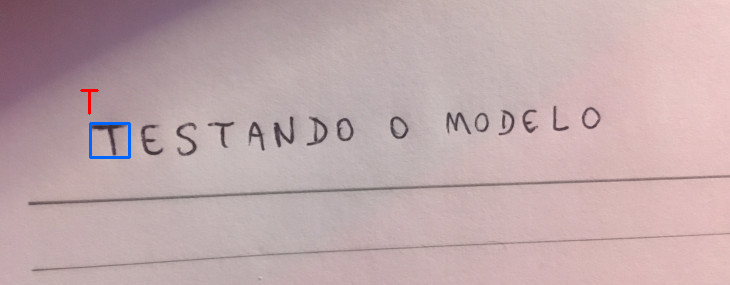

E  ->  100.0


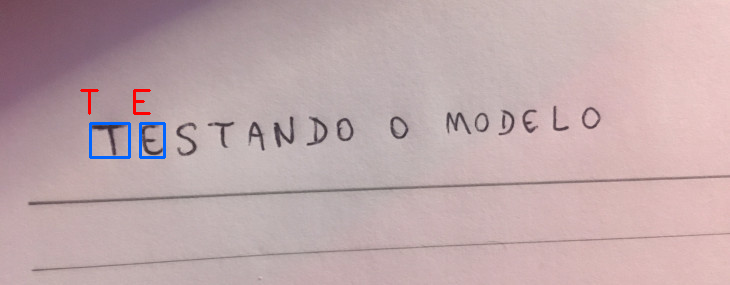

S  ->  94.17409300804138


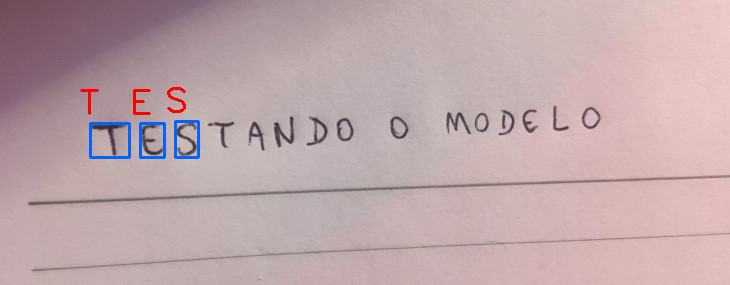

T  ->  99.92138147354126


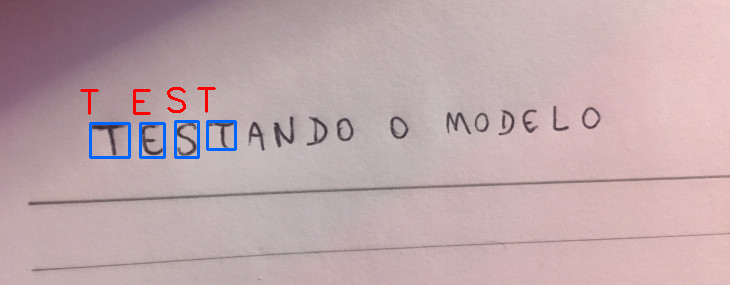

A  ->  99.99927282333374


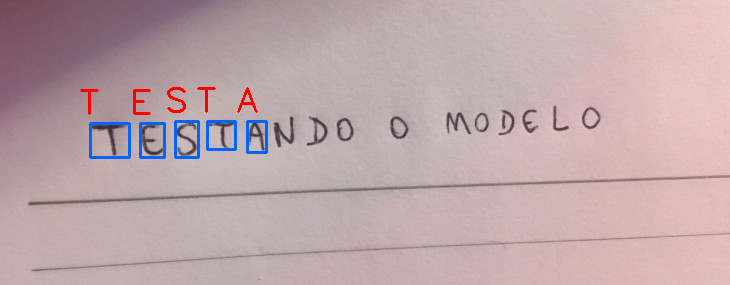

N  ->  99.99818801879883


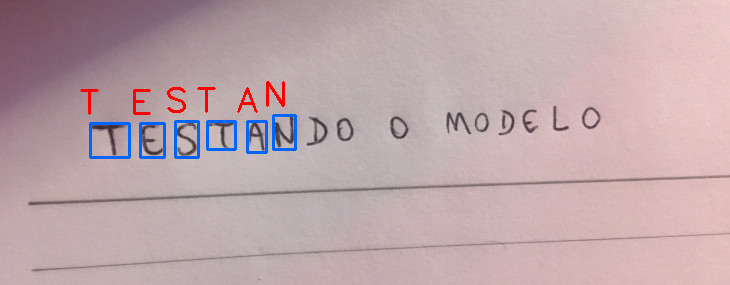

D  ->  99.998939037323


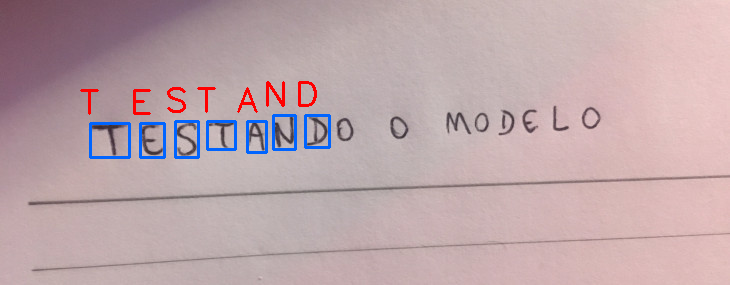

O  ->  96.5272307395935


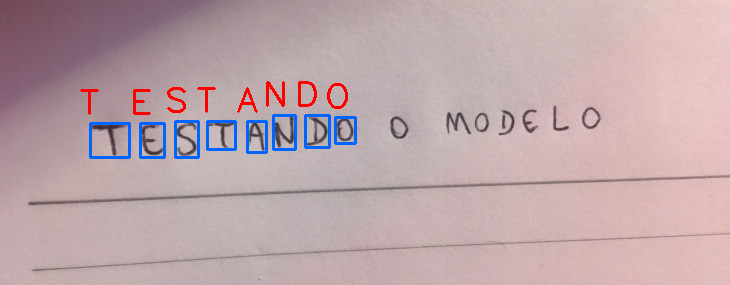

O  ->  75.24757981300354


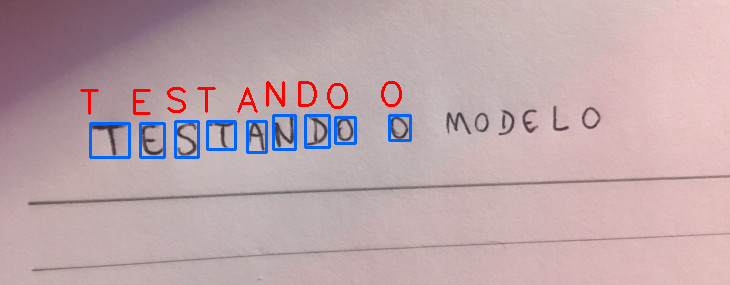

M  ->  99.72489476203918


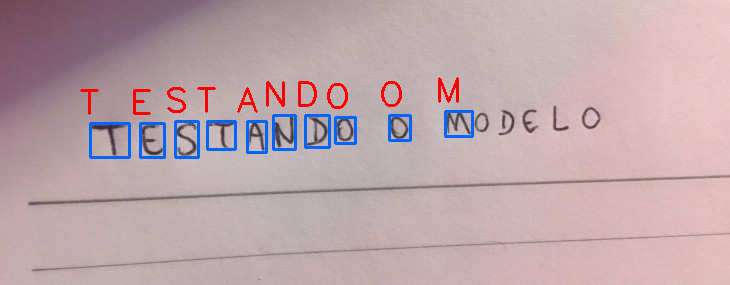

0  ->  85.25797724723816


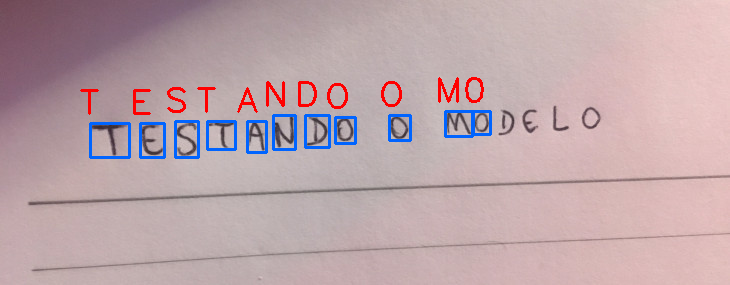

D  ->  63.49874138832092


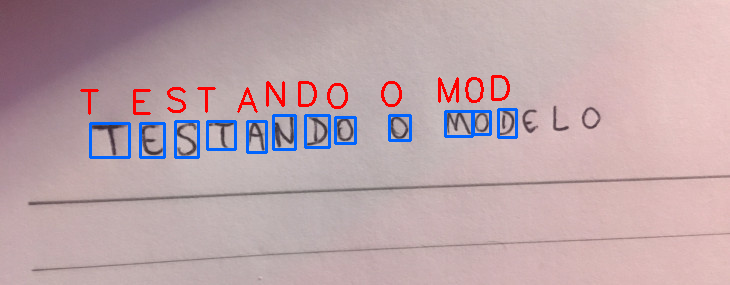

E  ->  100.0


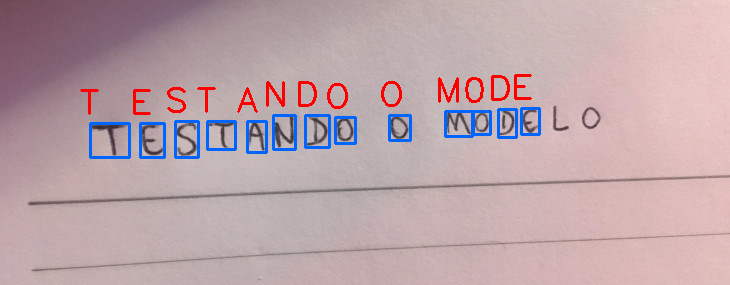

L  ->  99.99963045120239


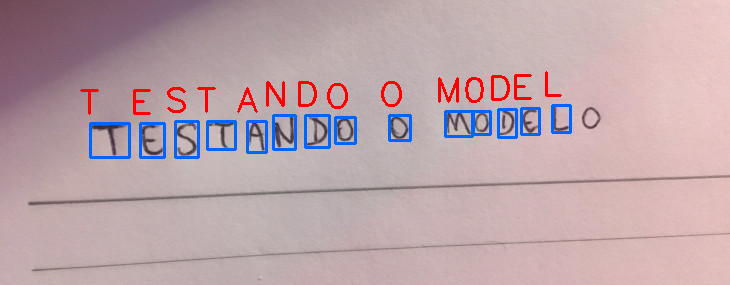

0  ->  67.17216968536377


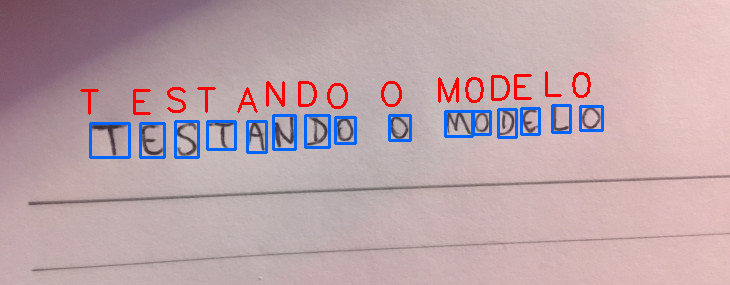

In [41]:
img_cp = img.copy()
for (previsoes, (x, y, w, h)) in zip(previsoes, caixas):
  i = np.argmax(previsoes)
  probabilidade = previsoes[i]
  caractere = lista_caracteres[i]

  cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255,100,0), 2)
  cv2.putText(img_cp, caractere, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255), 2)
  print(caractere, ' -> ', probabilidade * 100)

  cv2_imshow(img_cp)

# Outros testes

In [42]:
def preprocessar_img(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  desfoque = cv2.GaussianBlur(gray, (3, 3), 7)
  bordas = cv2.Canny(desfoque, 40, 150)
  dilatado = cv2.dilate(bordas, np.ones((3,3)))  
  return gray, dilatado

In [43]:
def predicao(previsoes, lista_caracteres):
  i = np.argmax(previsoes)
  probabilidade = previsoes[i]
  caractere = lista_caracteres[i]
  return i, probabilidade, caractere

In [44]:
def desenhar_na_img(img_cp, caractere):
  cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255, 100, 0), 2)
  cv2.putText(img_cp, caractere, (x - 10, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255), 2)

## O problema do 0 e O, 1 e I, 5 e S

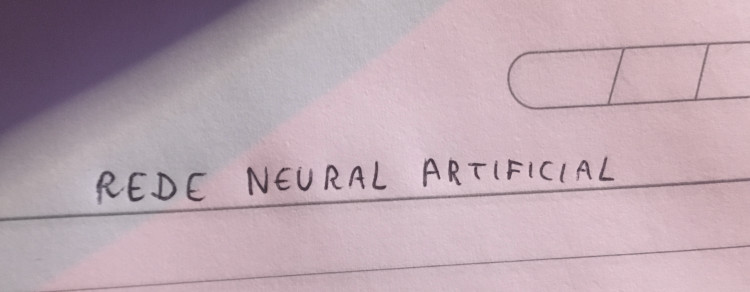

In [45]:
img = cv2.imread('/content/teste_manuscrito02.jpg')
cv2_imshow(img)

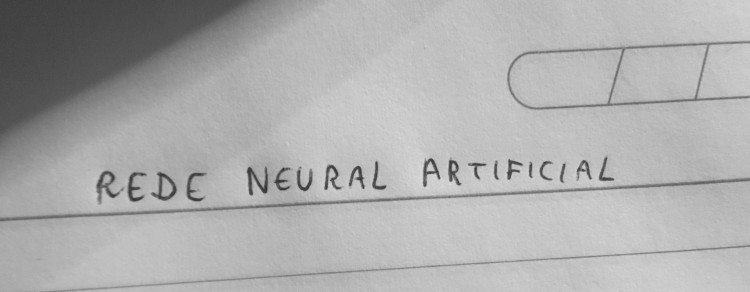

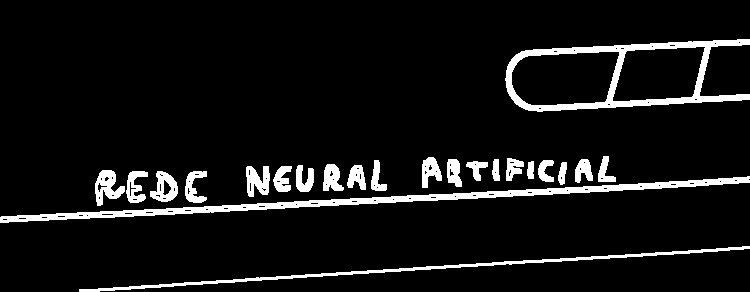

In [46]:
gray, img_processada = preprocessar_img(img)
cv2_imshow(gray)
cv2_imshow(img_processada)

In [47]:
conts = encontrar_contornos(img_processada.copy())
caracteres = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
    processa_caixa(gray, x, y, w, h)

caixas = [b[1] for b in caracteres]
caracteres = np.array([c[0] for c in caracteres], dtype="float32")
previsoes = rede_neural.predict(caracteres)

1/1 [==============================] - 0s 113ms/step


In [48]:
numeros_2 = "OI234S6789"
letras_2 = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
lista_caracteres_2 = numeros_2 + letras_2
lista_caracteres_2 = [l for l in lista_caracteres_2]

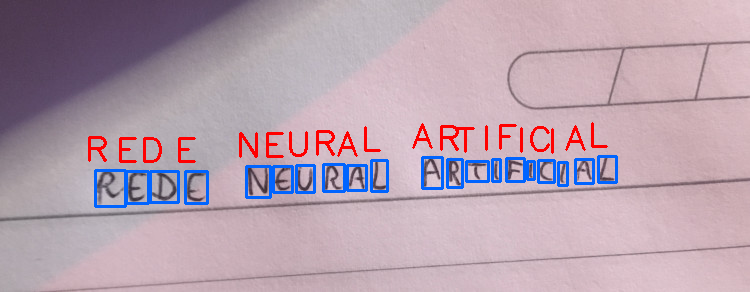

In [49]:
img_cp = img.copy()
for (previsoes, (x, y, w, h)) in zip(previsoes, caixas):
  i, probabilidade, caractere = predicao(previsoes, lista_caracteres_2)
  desenhar_na_img(img_cp, caractere)
cv2_imshow(img_cp)

## O problema do texto não detectado

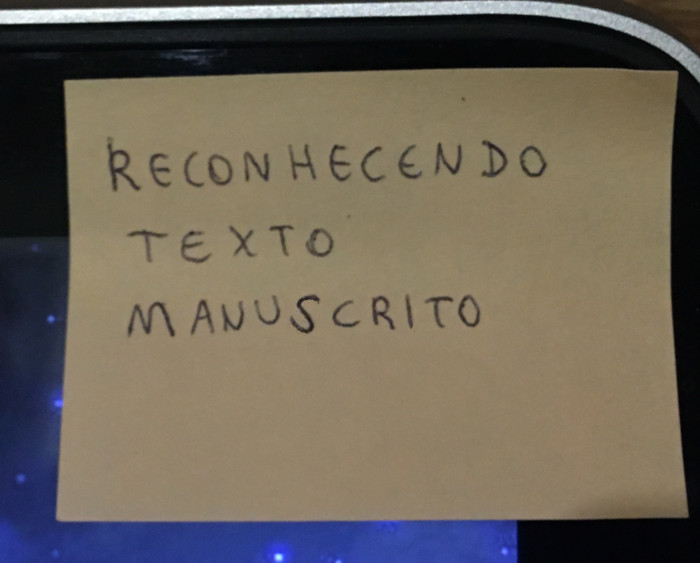

In [50]:
img = cv2.imread('/content/teste_manuscrito03.jpg')
cv2_imshow(img)

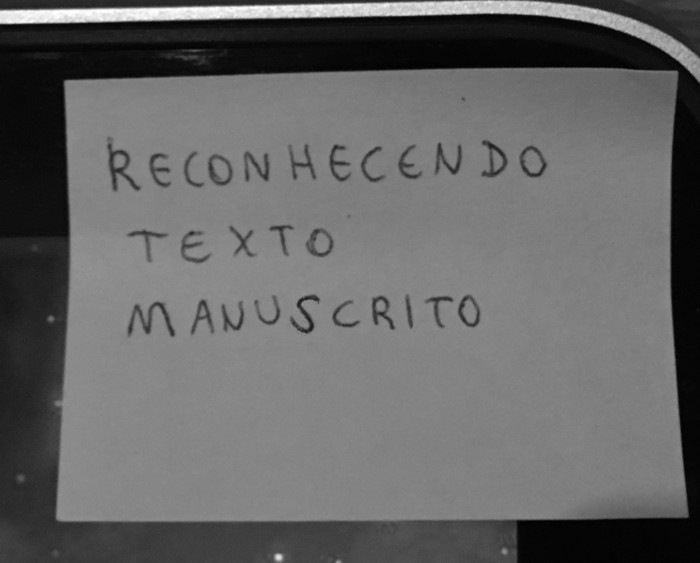

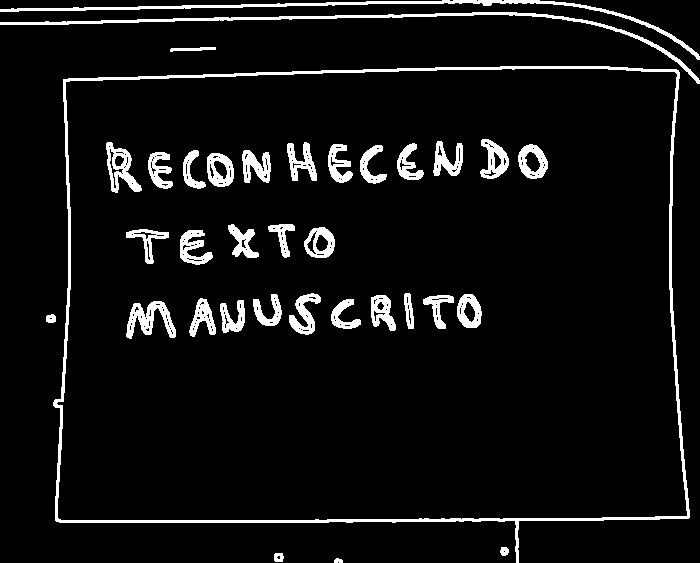

In [51]:
gray, img_processada = preprocessar_img(img)
cv2_imshow(gray)
cv2_imshow(img_processada)

In [ ]:
# RETR_EXTERNAL

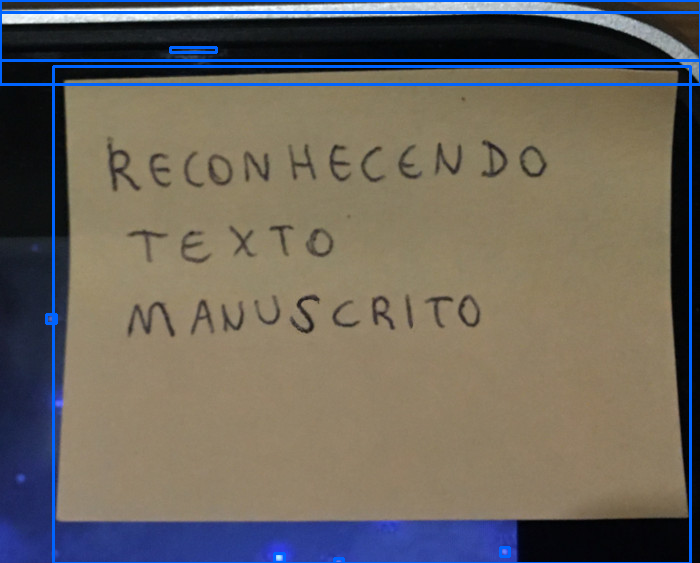

In [52]:
conts = encontrar_contornos(img_processada.copy())
img_cp = img.copy()
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  #if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
  roi = gray[y:y + h, x:x + w]
  thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255, 100, 0), 2)
cv2_imshow(img_cp)

In [53]:
img.shape

(563, 700, 3)

In [54]:
altura, largura = img.shape[:2]
print(altura, largura)

563 700


In [55]:
contornos_tamanho = sorted(conts, key=cv2.contourArea, reverse=True)

In [56]:
contornos_tamanho

[array([[[500,  66]],
 
        [[499,  67]],
 
        [[435,  67]],
 
        [[434,  68]],
 
        [[397,  68]],
 
        [[396,  69]],
 
        [[363,  69]],
 
        [[362,  70]],
 
        [[321,  70]],
 
        [[320,  71]],
 
        [[292,  71]],
 
        [[291,  72]],
 
        [[256,  72]],
 
        [[255,  73]],
 
        [[234,  73]],
 
        [[233,  74]],
 
        [[203,  74]],
 
        [[202,  75]],
 
        [[167,  75]],
 
        [[166,  76]],
 
        [[138,  76]],
 
        [[137,  77]],
 
        [[ 98,  77]],
 
        [[ 97,  78]],
 
        [[ 68,  78]],
 
        [[ 67,  79]],
 
        [[ 63,  79]],
 
        [[ 63, 101]],
 
        [[ 64, 102]],
 
        [[ 64, 122]],
 
        [[ 65, 123]],
 
        [[ 65, 156]],
 
        [[ 66, 157]],
 
        [[ 66, 184]],
 
        [[ 67, 185]],
 
        [[ 67, 208]],
 
        [[ 68, 209]],
 
        [[ 68, 287]],
 
        [[ 67, 288]],
 
        [[ 67, 304]],
 
        [[ 66, 305]],
 
        [[ 66, 3

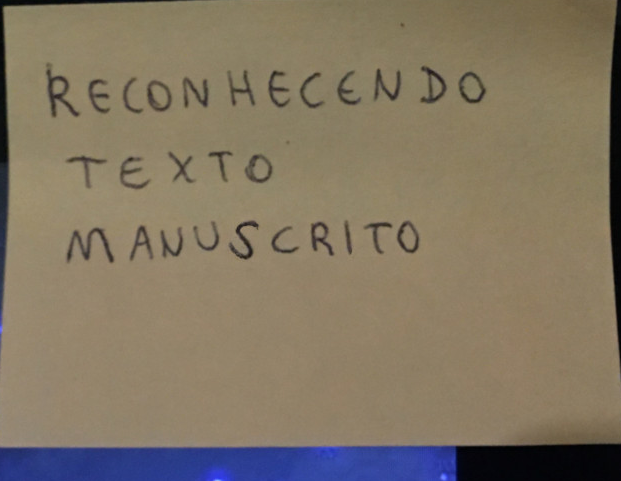

In [57]:
for c in contornos_tamanho:
  (x, y, w, h) = cv2.boundingRect(c)

  if (w >= (largura / 2)) and (h >= altura / 2):
    corta = 8
    img_cortada = img[y+corta:y + h - corta, x+corta:x + w - corta]
    cv2_imshow(img_cortada)

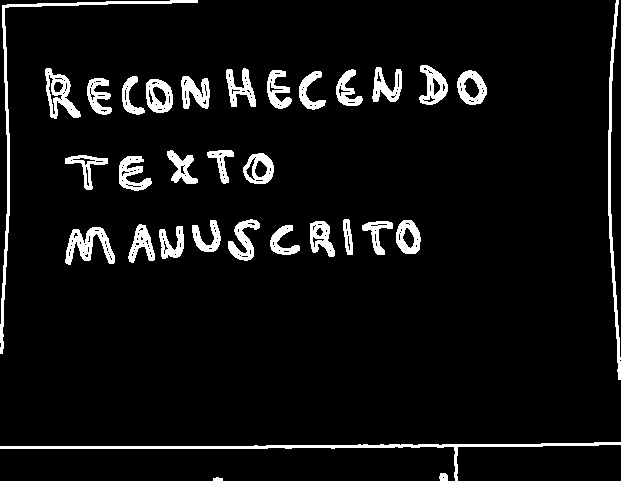

In [59]:
gray, img_processada = preprocessar_img(img_cortada)
cv2_imshow(img_processada)

1/1 [==============================] - 0s 109ms/step


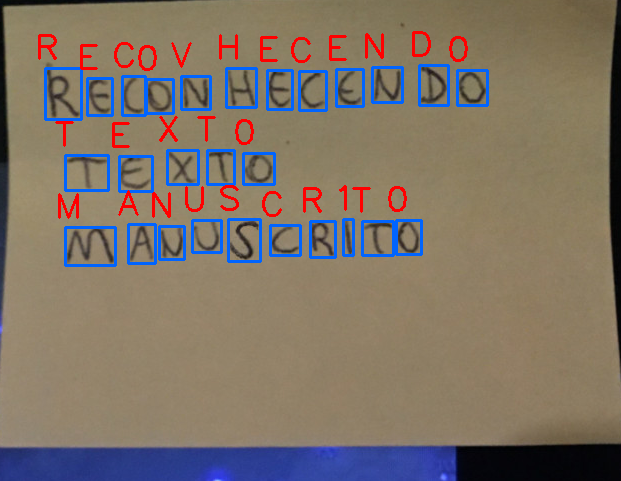

In [60]:
conts = encontrar_contornos(img_processada.copy())
caracteres = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
    processa_caixa(gray, x, y, w, h)

caixas = [b[1] for b in caracteres]
caracteres = np.array([c[0] for c in caracteres], dtype="float32")

previsoes = rede_neural.predict(caracteres)

img_cp = img_cortada.copy()

# percorre todas as predições e caixas delimitadoras
for (previsoes, (x, y, w, h)) in zip(previsoes, caixas): 
  i, probabilidade, caractere = predicao(previsoes, lista_caracteres)
  desenhar_na_img(img_cp, caractere)
cv2_imshow(img_cp)